In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf
import os; os.chdir('..')

## The data

The data is loaded using pandas and an example of the data frame is presented

In [2]:
# Load data
df = pd.read_csv('data/DK-DK2.csv', index_col=0)
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d %H:00')
df

,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_storage_avg,total_discharge_avg,...,latest_forecasted_wind_y_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
datetime,,,,,,,,,,,,,,,,,,,,,
2014-12-11 23:00,1418338800,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 00:00,1418342400,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 01:00,1418346000,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 02:00,1418349600,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-12 03:00,1418353200,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26 04:00,1569470400,DK-DK2,156.987260,223.801546,NaN,133.880082,2.370351e+08,388.0,NaN,NaN,...,1.807466,46.21,291.0,1392.0,45.0,590.0,NaN,750.0,0.0,83.0
2019-09-26 05:00,1569474000,DK-DK2,219.305322,221.593838,NaN,218.662122,3.568558e+08,357.0,NaN,NaN,...,2.149387,50.29,249.0,1615.0,498.0,590.0,NaN,493.0,3.0,82.0
2019-09-26 06:00,1569477600,DK-DK2,227.887112,226.866953,NaN,228.262772,3.945843e+08,466.0,NaN,NaN,...,2.543895,51.51,452.0,1714.0,528.0,590.0,NaN,398.0,17.0,77.0


## Time-series

Some of the time series in the data presented together. The data is clearly non-stationary

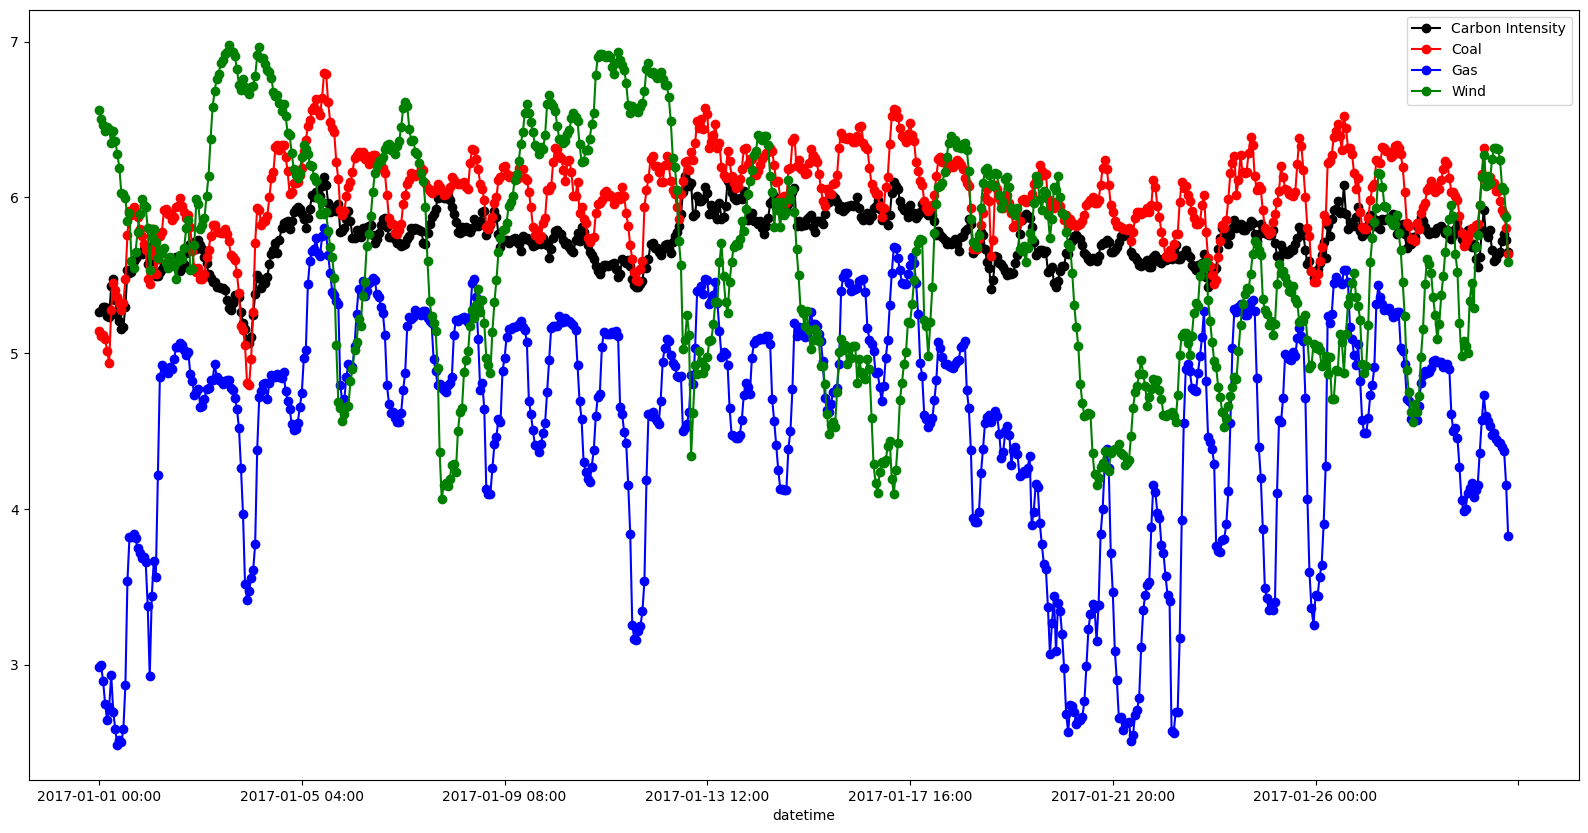

In [3]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
np.log(df.carbon_intensity_avg['2017-01-01':'2017-01-30']).plot(ax=ax, color='black', label='Carbon Intensity', marker='o')
np.log(df.power_consumption_coal_avg['2017-01-01':'2017-01-30']).plot(ax=ax, color='red', label='Coal', marker='o')
np.log(df.power_consumption_gas_avg['2017-01-01':'2017-01-30']).plot(ax=ax, color='blue', label='Gas', marker='o')
np.log(df.power_consumption_wind_avg['2017-01-01':'2017-01-30']).plot(ax=ax, color='green', label='Wind', marker='o')

ax.legend()


A first order differencing of the time series is used to transform the carbon_intensty_avg to become stationary

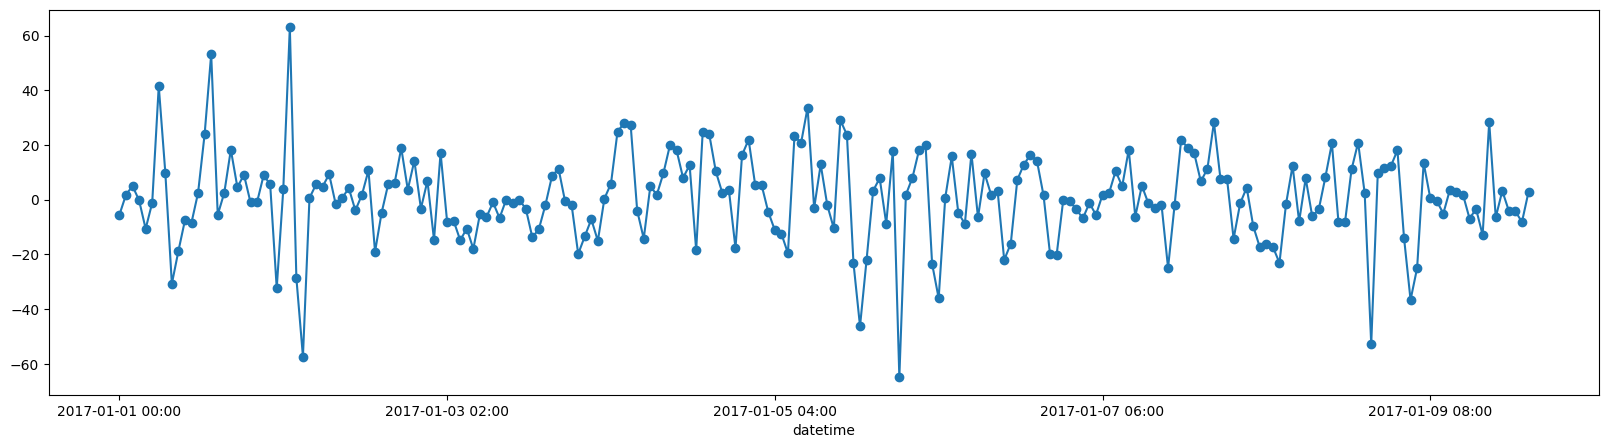

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
df.carbon_intensity_avg.diff()['2017-01-01':'2017-01-10'].plot(marker = 'o');



## The ACF

The ACF reveals a 24 hour seasonality.

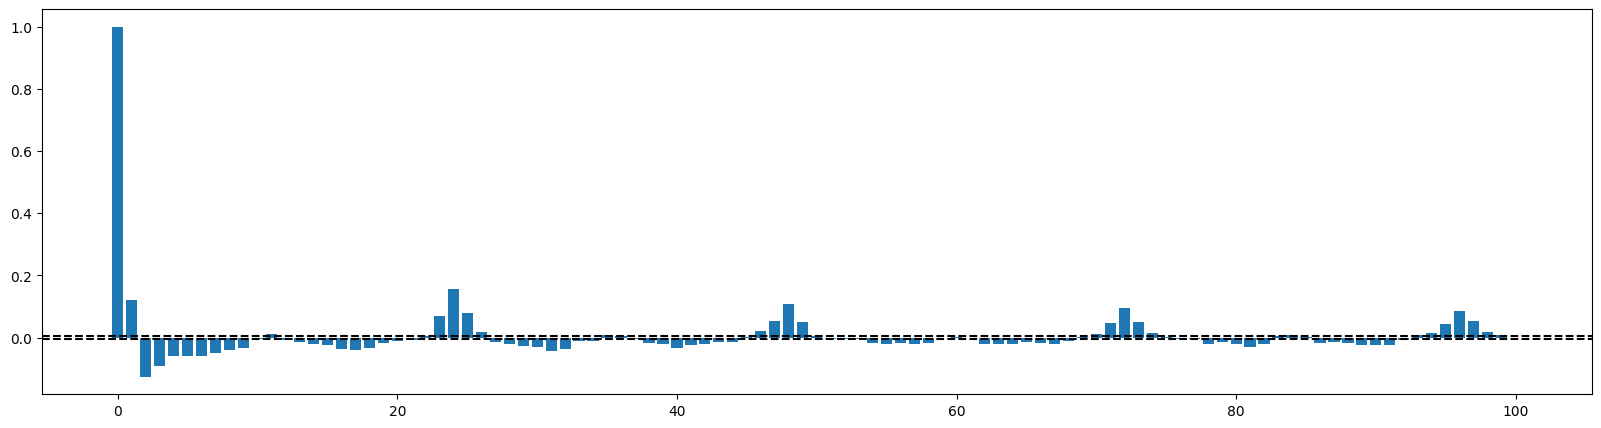

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
dc = df.carbon_intensity_avg.diff().values
c = df.carbon_intensity_avg.values
acf_ = acf(dc, nlags=100, missing='drop')

ax.bar(np.arange(len(acf_)), acf_)
ax.axhline(1/np.sqrt(len(dc)), linestyle='--', color='black')
ax.axhline(-1/np.sqrt(len(dc)), linestyle='--', color='black');
